# Lirbaries

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../src/")
from xgboost_tuning_with_hyperopt import *

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# Classification

## Load data

In [2]:
data = load_breast_cancer()
print(data.keys())
y = pd.Series(data["target"])
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train a first model

### Split in train, valid, test

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train)

### Tune xgboost classfier with hyperopt

In [4]:
xgb_classifier = XGBClassifierTuning(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [00:00<00:00, 14.43it/s, best loss: 0.006904216440636546]


### Classification report

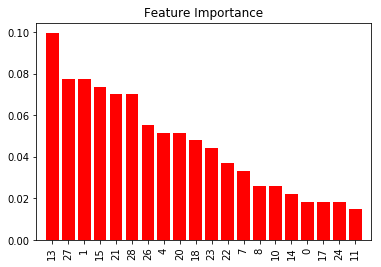

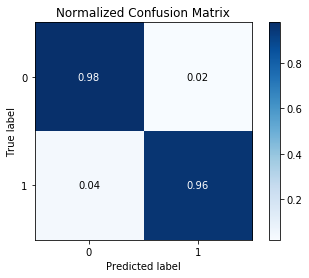

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.96      0.97        67

   micro avg       0.96      0.96      0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.96      0.96      0.96       107



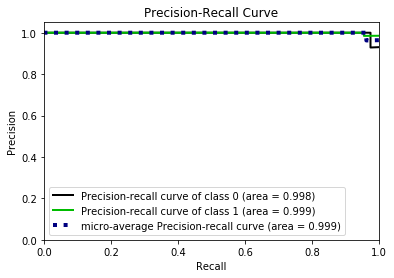

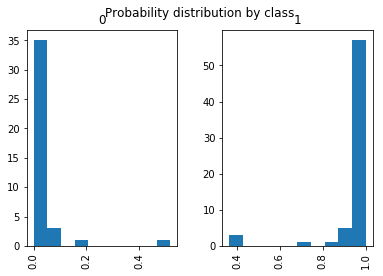

In [5]:
xgb_classifier.report(X_test, y_test)

## Same process with one function

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test, xgb_classifier = train_tuned_xgboost(
    X, y)

100%|██████████| 10/10 [00:00<00:00, 25.23it/s, best loss: 0.00441293988164615]


## Repeat process to get a benchmark on a dataset

In [7]:
benchmark_metrics = xgboost_baseline(X, y, n_splits=10)

  0%|          | 0/10 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 23.37it/s, best loss: 0.004381049836713835]

 10%|█         | 1/10 [00:00<00:04,  2.01it/s]


100%|██████████| 10/10 [00:00<00:00, 16.60it/s, best loss: 0.0001851166234727586]


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]


100%|██████████| 10/10 [00:00<00:00, 17.48it/s, best loss: 0.003033008009939442]


 30%|███       | 3/10 [00:01<00:04,  1.66it/s]


100%|██████████| 10/10 [00:00<00:00, 17.44it/s, best loss: 0.003443148769010307]

 40%|████      | 4/10 [00:02<00:03,  1.62it/s]


100%|██████████| 10/10 [00:00<00:00, 20.60it/s, best loss: 0.0025410193469039832]

 50%|█████     | 5/10 [00:03<00:03,  1.65it/s]


100%|██████████| 10/10 [00:00<00:00, 24.13it/s, best loss: 0.008409002510116226]

 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]


100%|██████████| 10/10 [00:00<00:00, 19.78it/s, best loss: 0.017244778405381633]


 70%|███████   | 7/10 [00:04<00:01,  1.76it/s]


100%|██████████| 10/10 [00:00<00:00, 29.42it/s, best loss: 0.004625204880645883]


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]


100%|██████████| 10/10 [00:00<00:00, 19.55it/s, best loss: 0.003865983613124846]

 90%|█████████ | 9/10 [00:05<00:00,  1.83it/s]


100%|██████████| 10/10 [00:00<00:00, 22.32it/s, best loss: 0.002545928923044949]

100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


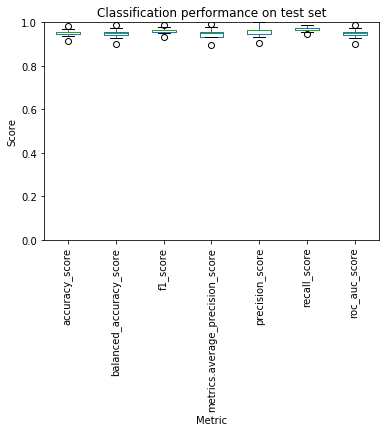

In [8]:
pd.DataFrame(benchmark_metrics).plot.box()
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Classification performance on test set")
plt.show()

# Regression

## Load data

In [9]:
data = load_boston()
y = pd.Series(data["target"])
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Train a first model

### Split in train, valid, test

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train)

### Tune xgboost regression with hyperopt

In [11]:
xgb_regressor = XGBRegressorTuning(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [00:01<00:00,  6.11it/s, best loss: 9.178006289756667]


### Regression report

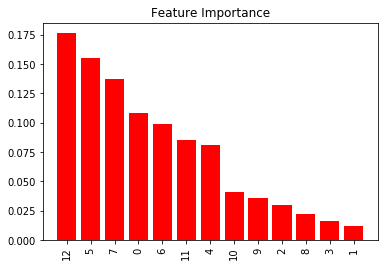

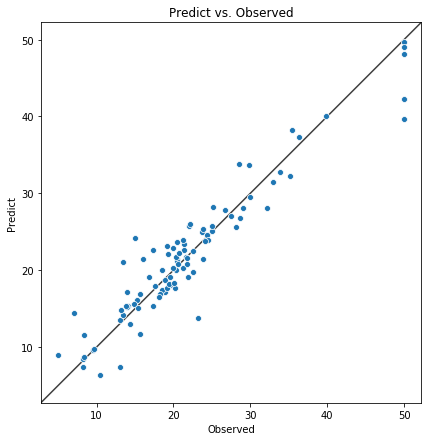

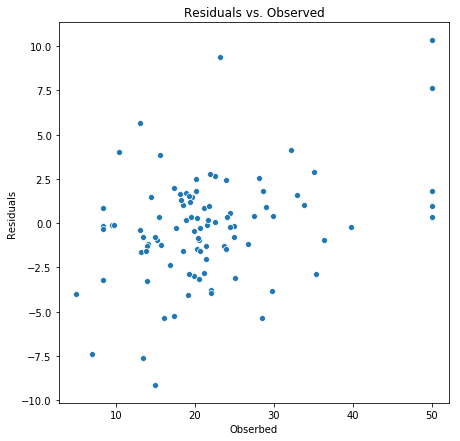

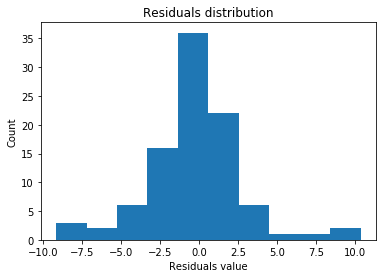

,explained_variance_score,mean_absolute_error,mean_squared_log_error,median_absolute_error,r2_score
0,0.896274,2.150263,0.028229,1.454012,0.895614


In [12]:
xgb_regressor.report(X_test, y_test)

## Same process with one function

In [13]:
X_train, y_train, X_val, y_val, X_test, y_test, xgb_regressor = train_tuned_xgboost(
    X,
    y,
    regression=True,
    eval_metric="rmse",
    optimized_metric=metrics.mean_squared_error)

100%|██████████| 10/10 [00:02<00:00,  4.93it/s, best loss: 18.024957971657887]


## Repeat process to get a benchmark on the dataset

In [14]:
benchmark_metrics = xgboost_baseline(
    X,
    y,
    n_splits=10,
    regression=True,
    eval_metric="rmse",
    optimized_metric=metrics.mean_squared_error)

  0%|          | 0/10 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:02<00:00,  4.09it/s, best loss: 17.57371028121043]


 10%|█         | 1/10 [00:02<00:23,  2.58s/it]


100%|██████████| 10/10 [00:01<00:00,  6.64it/s, best loss: 9.133626586228432]


 20%|██        | 2/10 [00:04<00:18,  2.34s/it]


100%|██████████| 10/10 [00:01<00:00,  5.63it/s, best loss: 7.453249878581707]


 30%|███       | 3/10 [00:05<00:14,  2.11s/it]


100%|██████████| 10/10 [00:01<00:00,  5.80it/s, best loss: 9.87337313788929] 


 40%|████      | 4/10 [00:07<00:12,  2.04s/it]


100%|██████████| 10/10 [00:01<00:00,  6.77it/s, best loss: 9.102102001084951]


 50%|█████     | 5/10 [00:09<00:09,  1.90s/it]


100%|██████████| 10/10 [00:01<00:00,  5.66it/s, best loss: 13.601797727942483]

 60%|██████    | 6/10 [00:11<00:07,  1.94s/it]


100%|██████████| 10/10 [00:01<00:00,  5.51it/s, best loss: 11.178896611508451]


 70%|███████   | 7/10 [00:13<00:05,  1.98s/it]


100%|██████████| 10/10 [00:01<00:00,  7.29it/s, best loss: 5.030510430996779]

 80%|████████  | 8/10 [00:15<00:03,  1.91s/it]


100%|██████████| 10/10 [00:01<00:00,  6.52it/s, best loss: 13.704782536460291]

 90%|█████████ | 9/10 [00:16<00:01,  1.86s/it]


100%|██████████| 10/10 [00:01<00:00,  6.39it/s, best loss: 24.138600217600313]


100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


In [15]:
df_benchmark = pd.DataFrame(benchmark_metrics)
df_benchmark

,explained_variance_score,mean_absolute_error,mean_squared_log_error,median_absolute_error,r2_score
0,0.818899,2.585274,0.025185,1.820383,0.818831
1,0.831003,2.201932,0.024544,1.515150,0.829724
2,0.838268,2.328578,0.022666,1.584945,0.835289
3,0.869368,2.213896,0.018857,1.629881,0.869310
4,0.873347,2.274938,0.023231,1.687037,0.873307
5,0.856929,2.572240,0.020896,1.684956,0.855458
6,0.896068,2.073449,0.016101,1.666128,0.896001
7,0.895035,2.316667,0.019796,1.612094,0.894887
8,0.866364,2.188510,0.017128,1.680547,0.866277
9,0.876836,2.616784,0.026909,1.767029,0.866335


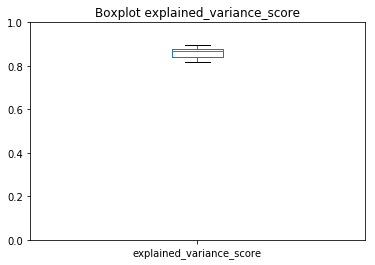

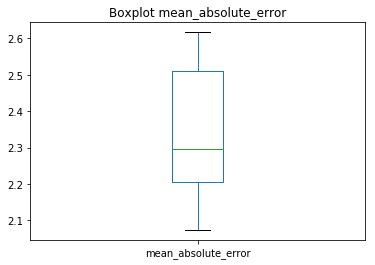

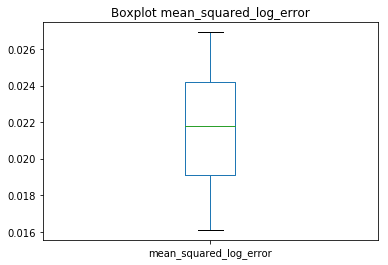

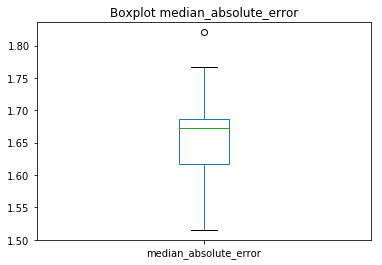

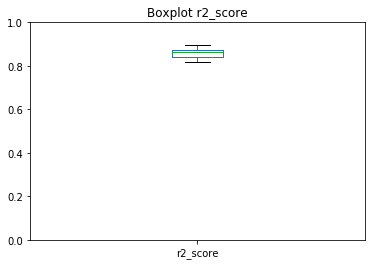

In [16]:
for col in df_benchmark.columns:
    df_benchmark[col].plot(kind="box")
    plt.title("Boxplot " + col)
    if col in ["explained_variance_score", "r2_score"]:
        plt.ylim((0, 1))
    plt.show()